In [2]:
!git clone https://github.com/AshishJangra27/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 328, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 328 (delta 19), reused 54 (delta 9), pack-reused 235
Receiving objects: 100% (328/328), 278.62 MiB | 16.09 MiB/s, done.
Resolving deltas: 100% (145/145), done.
Updating files: 100% (225/225), done.


In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/datasets/Job Postings/jobs.csv.zip')
df

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,job_link,company_link
0,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110 Reviews,"Customer Service,Sales,Relationship Management",1 Day Ago,https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213
1,6.012391e+10,Product Owner Senior Manager,Accenture,11-15 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Product management,Market analysis,Change mana...",1 Day Ago,https://www.naukri.com/job-listings-product-ow...,https://www.naukri.com/accenture-jobs-careers-...
2,6.012391e+10,Employee Relations and Policies Associate Manager,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
3,6.012391e+10,Employee Relations and Policies Specialist,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...
4,6.012301e+10,SAP BO Consultant,Mindtree,5-7 Yrs,Not disclosed,"Hybrid - Kolkata, Hyderabad/Secunderabad, Pune...",4.1,3759 Reviews,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object...",1 Day Ago,https://www.naukri.com/job-listings-sap-bo-con...,https://www.naukri.com/mindtree-jobs-careers-3...
...,...,...,...,...,...,...,...,...,...,...,...,...
79142,6.012301e+10,.Net Fullstack Developer,Citiustech,3-8 Yrs,"7,00,000 - 17,00,000 PA.","Hybrid - Pune, Bangalore/Bengaluru, Mumbai (Al...",4.0,742 Reviews,"c#,.net core,javascript,Microservices,Angular,...",2 Days Ago,https://www.naukri.com/job-listings-net-fullst...,https://www.naukri.com/citiustech-jobs-careers...
79143,1.122201e+10,Senior (BI) Business Intelligence Architect,Hexaware Technologies,10-13 Yrs,Not disclosed,"Hybrid - Pune, Chennai, Bangalore/Bengaluru, M...",3.7,3172 Reviews,"Informatica Mdm,etl,business intelligence,Agil...",1 Day Ago,https://www.naukri.com/job-listings-senior-bi-...,https://www.naukri.com/hexaware-technologies-j...
79144,1.512220e+11,PowerBI Developer,EY,5-10 Yrs,Not disclosed,"Hybrid - Pune, Mumbai (All Areas)",3.8,6267 Reviews,"pagination,Power Bi,Dax",2 Days Ago,https://www.naukri.com/job-listings-powerbi-de...,https://www.naukri.com/ey-jobs-careers-9156
79145,2.712220e+11,Customer Service Associate,Tech Mahindra,0-2 Yrs,"2,50,000 - 3,50,000 PA.","Temp. WFH - Noida, Kolkata, New Delhi, Hyderab...",3.7,21440 Reviews,"Bengali,International BPO,BPO,Customer Service...",10 Days Ago,https://www.naukri.com/job-listings-customer-s...,https://www.naukri.com/tech-mahindra-jobs-care...


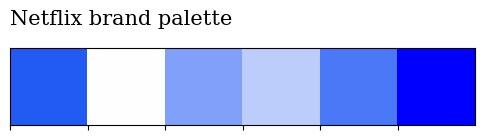

In [4]:
sns.palplot(['#225af4', '#fefefe', '#80a0f9', '#bdcdfb', '#4a78f6','#0000FF'])

plt.title("Netflix brand palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

### 1. Handling Duplicate & Null Values

##### 1.1) Checking Null Values

In [5]:
df.isnull().sum()

job_id               480
job_role             480
company              481
experience          1749
salary               480
location            1706
rating             36199
reviews            36199
resposibilities      500
posted_on            480
job_link             480
company_link         480
dtype: int64

##### 1.2) Removing Null values

In [6]:
df = df.dropna(subset=['job_id', 'job_role', 'company', 'experience', 'salary', 'location',
                      'resposibilities', 'posted_on', 'job_link', 'company_link'])

##### 1.3) Checking Duplicate Values



In [7]:
print(df.duplicated().sum())

print(df.duplicated(subset=['job_id']).sum())

print(df.duplicated(subset=['job_link']).sum())

5312
5640
5640


##### 1.4) Remove the Null Values

In [8]:
df = df.drop_duplicates(subset=['job_link'])

### 2. Exploratory Data Analysis

##### 2.1) Exploring job_id Column

In [9]:
df['job_id'].nunique() == len(df)

True

- convert it to string data-type
- get it from link column

##### 2.2) Exploring job_role Column

In [10]:
df['job_role'].nunique()

50240

##### 2.3) Exploring company Column

In [11]:
df['company'].nunique()

14927

##### 2.4) Exploring company & company_link Column together

In [12]:
print(df['company'].nunique())
print(df['company_link'].nunique())

14927
13525


##### 2.5) Exploring companies whose links are mathcing but names are different

In [13]:
df['company_id'] =  df['company_link'].str.lower().str.split('-').str[-1]

# for company_id in tqdm(df['company_id'].unique()):
#   no_of_un_links = df[df['company_id'] == company_id]['company_link'].nunique()
#   if (no_of_un_links != 1):
#     print(company_id, no_of_un_links)

df.groupby('company_id').nunique()['company_link'].sort_values(ascending = False).head()

company_id
0          50
2778010     2
932996      2
5546386     1
5542006     1
Name: company_link, dtype: int64

In [14]:
df['job_link'].nunique()

71738

### 3. Extract Key Responsibilities

##### 3.1) Top 20 most frequency responsibilities

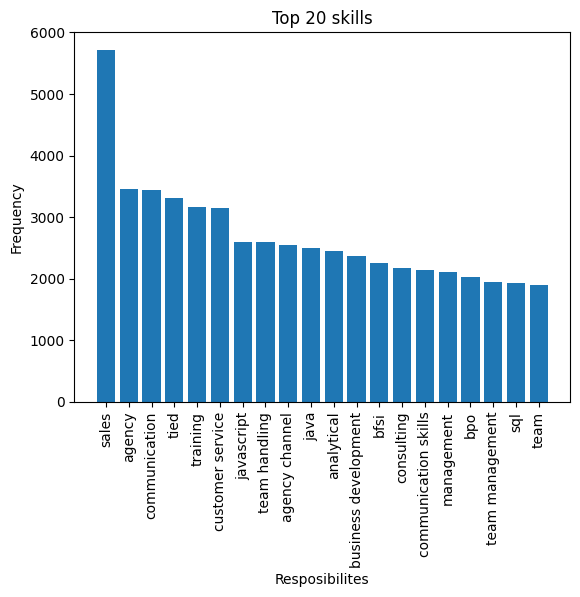

In [15]:
# group the dataframe by company and count the number of jobs
resposibilities_df = df['resposibilities'].str.lower().str.split(',').explode().value_counts().sort_values(ascending = False).head(20).reset_index()

# create a barplot of the number of jobs per company
plt.bar(resposibilities_df['resposibilities'], resposibilities_df['count'])
plt.title('Top 20 skills')
plt.xlabel('Resposibilites')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

<ipython-input-19-a8cf39479a7c>:21: UserWarning: 
The palette list has fewer values (5) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=responsibilities_df, x='resposibilities', y='count', hue='resposibilities', dodge=False, palette=palette, legend=False)


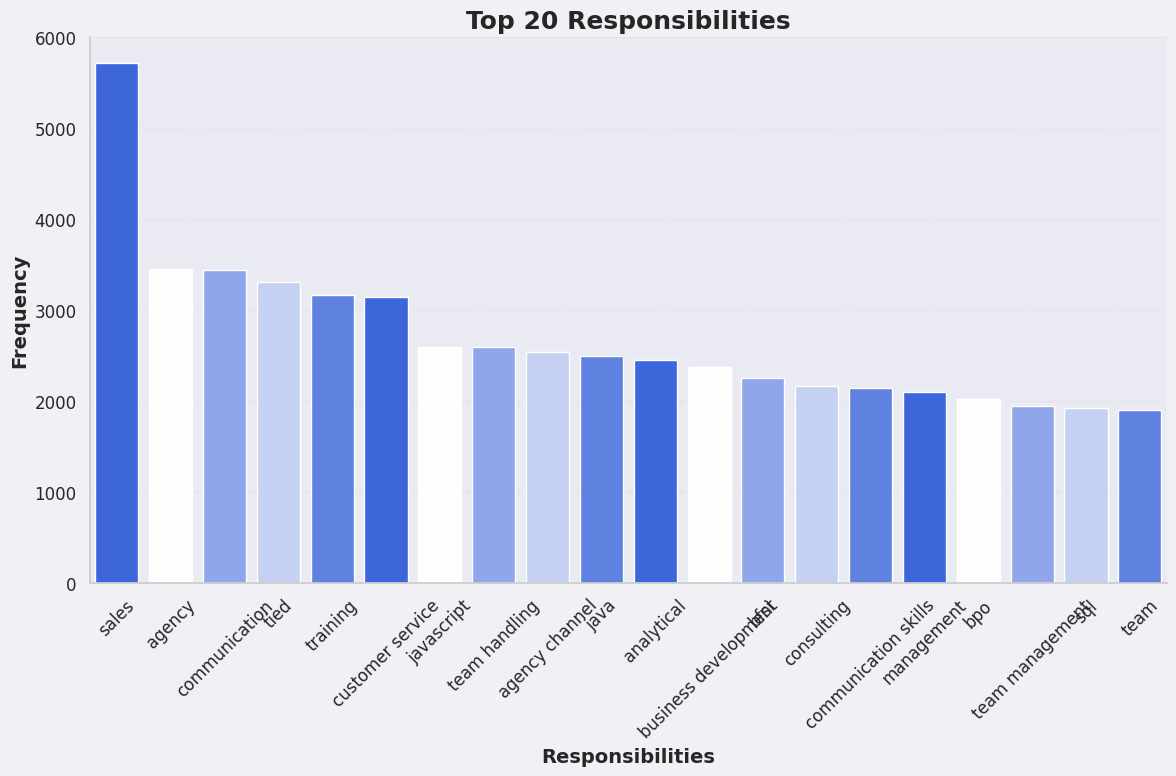

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the custom color palette
palette = ['#225af4', '#fefefe', '#80a0f9', '#bdcdfb', '#4a78f6']

# Group the dataframe by responsibilities and count the number of occurrences
responsibilities_df = df['resposibilities'].str.lower().str.split(',').explode().value_counts().sort_values(ascending=False).head(20).reset_index()
responsibilities_df.columns = ['resposibilities', 'count']

# Set plot style with various parameters
sns.set(
    style="whitegrid",        # Overall style
    context="notebook",       # Scaling of plot elements
    font="Arial",             # Font family
    font_scale=1.2            # Font scaling
)

# Create a barplot of the number of jobs per responsibility using Seaborn with the custom palette
plt.figure(figsize=(12, 8))
sns.barplot(data=responsibilities_df, x='resposibilities', y='count', hue='resposibilities', dodge=False, palette=palette, legend=False)

# Customize the plot
plt.title('Top 20 Responsibilities', fontsize=18, fontweight='bold')
plt.xlabel('Responsibilities', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.2)

# Remove the top and right spines
sns.despine()

# Set background color
plt.gca().set_facecolor('#eaeaf2')  # Axes background color
plt.gcf().set_facecolor('#f0f0f5')  # Figure background color

# Show the plot
plt.tight_layout()
plt.show()


##### 3.2) Top 6 most frequency in-general responsibilitiesspecific field

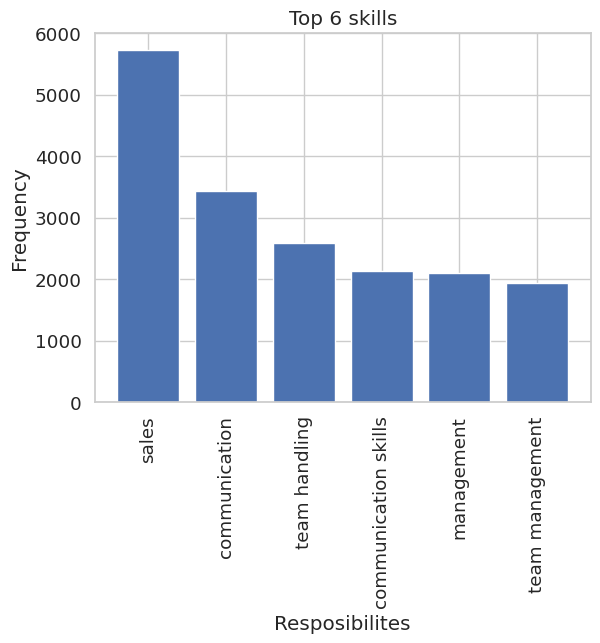

In [20]:
df_res =   pd.DataFrame([['sales',	5722],
        ['communication',	3444],
        ['team handling',	2596],
        ['communication skills',	2141],
        ['management',	2099],
        ['team management',	1942]])

df_res.columns = ['resposibilities', 'count']


# create a barplot of the number of jobs per company
plt.bar(df_res['resposibilities'], df_res['count'])
plt.title('Top 6 skills')
plt.xlabel('Resposibilites')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

##### 3.3) Top 20 most frequency responsibilities for Specific Company

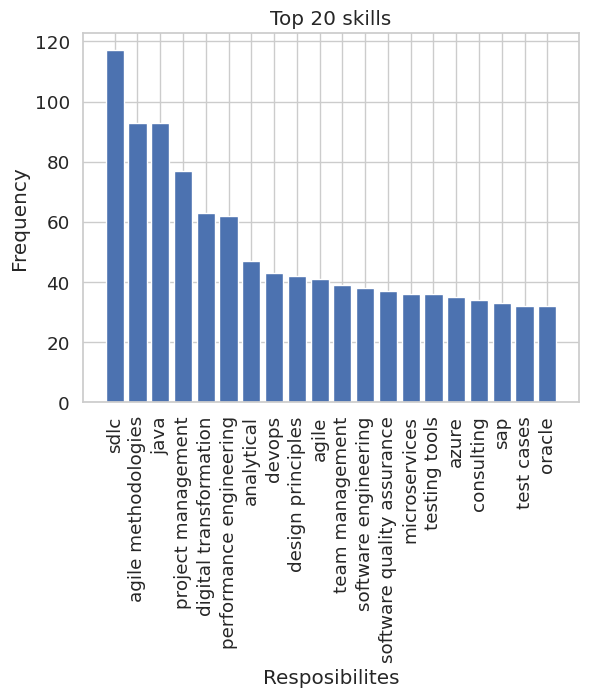

In [21]:
# group the dataframe by company and count the number of jobs
resposibilities_df = df[df['company'] == 'Infosys']['resposibilities'].str.lower().str.split(',').explode().value_counts().sort_values(ascending = False).head(20).reset_index()

# create a barplot of the number of jobs per company
plt.bar(resposibilities_df['resposibilities'], resposibilities_df['count'])
plt.title('Top 20 skills')
plt.xlabel('Resposibilites')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

##### 3.4) Top 20 most frequency responsibilities for Specific Job Role

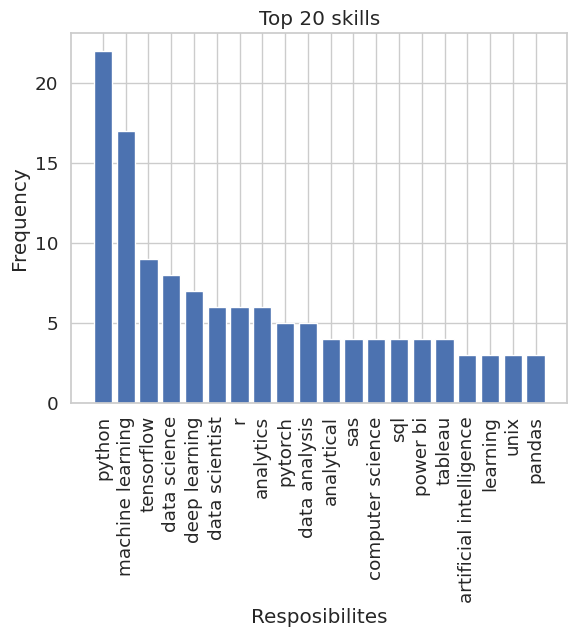

In [22]:
# group the dataframe by company and count the number of jobs
resposibilities_df = df[df['job_role'] == 'Data Scientist']['resposibilities'].str.lower().str.split(',').explode().value_counts().sort_values(ascending = False).head(20).reset_index()

# create a barplot of the number of jobs per company
plt.bar(resposibilities_df['resposibilities'], resposibilities_df['count'])
plt.title('Top 20 skills')
plt.xlabel('Resposibilites')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

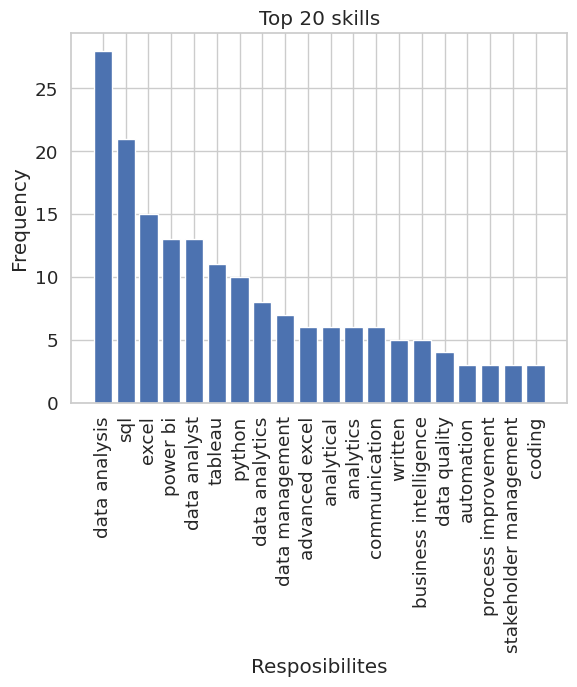

In [23]:
# group the dataframe by company and count the number of jobs
resposibilities_df = df[df['job_role'] == 'Data Analyst']['resposibilities'].str.lower().str.split(',').explode().value_counts().sort_values(ascending = False).head(20).reset_index()

# create a barplot of the number of jobs per company
plt.bar(resposibilities_df['resposibilities'], resposibilities_df['count'])
plt.title('Top 20 skills')
plt.xlabel('Resposibilites')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [24]:
df['resposibilities'].str.lower().str.split(',').explode().unique()[:50]

array(['customer service', 'sales', 'relationship management',
       'product management', 'market analysis', 'change management',
       'agile', 'analytics', 'business process', 'strategy consulting',
       'interpersonal skills', 'team management',
       'stakeholder management', 'continuous improvement',
       'data analytics', 'program management', 'sap bo', 'pl / sql',
       'oracle sql', 'sap business objects 4 x ( information design tool',
       'universe design tool', 'web intelligence',
       'sap bo administration', 'sap bo dashboards', 'itam', 'itsm',
       'hrsd', 'grc', 'itom', 'csd', 'c++', 'stl', 'node js', 'svn', 'go',
       'git', 'python', 'order management', 'warehouse management',
       'supply chain management', 'performance management',
       'conflict management', 'consulting', 'written communication',
       'excel', 'performance improvement', 'forensic',
       'analytical skills', 'service delivery', 'audit compliance'],
      dtype=object)

In [ ]:
import re

text = ['excellent', 'ms excel', 'microsoft excel', 'excel', 'advance excel']
pattern = r"\b(excel)\b"

for item in text:
  match = re.search(pattern, item)
  if match:
    print(item, match.group(1))

In [26]:
df.head()

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,job_link,company_link,company_id
0,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110 Reviews,"Customer Service,Sales,Relationship Management",1 Day Ago,https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213,213
1,6.012391e+10,Product Owner Senior Manager,Accenture,11-15 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Product management,Market analysis,Change mana...",1 Day Ago,https://www.naukri.com/job-listings-product-ow...,https://www.naukri.com/accenture-jobs-careers-...,7682
2,6.012391e+10,Employee Relations and Policies Associate Manager,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...,7682
3,6.012391e+10,Employee Relations and Policies Specialist,Accenture,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Business process,Change management,Team manage...",1 Day Ago,https://www.naukri.com/job-listings-employee-r...,https://www.naukri.com/accenture-jobs-careers-...,7682
4,6.012301e+10,SAP BO Consultant,Mindtree,5-7 Yrs,Not disclosed,"Hybrid - Kolkata, Hyderabad/Secunderabad, Pune...",4.1,3759 Reviews,"SAP BO,PL / SQL,Oracle SQL,SAP Business Object...",1 Day Ago,https://www.naukri.com/job-listings-sap-bo-con...,https://www.naukri.com/mindtree-jobs-careers-3...,30528


In [96]:
skills = ['sql', 'excel']

# Define a lambda function to count the matching skills
find_match = lambda responsibility: sum(skill in responsibility.split(',') for skill in skills)

# Apply the lambda function to the 'resposibilities' column
df['matching'] = df['resposibilities'].str.lower().apply(find_match)

# Filter and sort the dataframe
result = df[df['matching'] > 1].sort_values(by=['matching', 'rating'], ascending=False)

# Display the result
result

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,job_link,company_link,company_id,mathcing,matching
31491,6.012350e+10,Operations Analysis Analyst,S&P Global Inc.,2-5 Yrs,Not disclosed,Noida,5.0,3 Reviews,"analytical,written,verbal,Excel,SQL,presentati...",1 Day Ago,https://www.naukri.com/job-listings-operations...,https://www.naukri.com/jaigopal-garodia-rashtr...,2525726,2,2
45120,4.012350e+10,Sr Consulting Analyst,S&P Global Inc.,3-6 Yrs,Not disclosed,Gurgaon/Gurugram,5.0,3 Reviews,"PPT,Excel,Python,ESRI ArcGIS,analytical,ArcGIS...",4 Days Ago,https://www.naukri.com/job-listings-sr-consult...,https://www.naukri.com/jaigopal-garodia-rashtr...,2525726,2,2
22137,4.012350e+10,Data Analyst,Onit,0-2 Yrs,Not disclosed,Pune,4.5,10 Reviews,"BeautifulSoup,data analytics,Excel,SQL,Pandas,...",3 Days Ago,https://www.naukri.com/job-listings-data-analy...,https://www.naukri.com/onit-jobs-careers-4557922,4557922,2,2
24245,2.912225e+11,Product Analyst,Funding Societies,3-8 Yrs,Not disclosed,Bangalore/Bengaluru,4.5,3 Reviews,"Product Analyst,Health insurance,Google Analyt...",9 Days Ago,https://www.naukri.com/job-listings-product-an...,https://www.naukri.com/funding-societies-jobs-...,4383334,2,2
17062,7.012350e+10,Data Analyst,Control Risks India Pvt Ltd.,1-3 Yrs,Not disclosed,Mumbai,4.2,5 Reviews,"Career development,Automation,Excel,Coding,Pro...",1 Day Ago,https://www.naukri.com/job-listings-data-analy...,https://www.naukri.com/control-20risks-20india...,2607688,2,2
14658,3.012229e+11,Visual Basic For Applications Programming Lang...,Accenture,4-6 Yrs,Not disclosed,Chennai,4.1,32129 Reviews,"Data validation,Visual Basic,HP data protector...",8 Days Ago,https://www.naukri.com/job-listings-visual-bas...,https://www.naukri.com/accenture-jobs-careers-...,7682,2,2
20357,2.012300e+10,Openings For Data Analyst,iOPEX,2-7 Yrs,"5,00,000 - 12,00,000 PA.","Chennai, Bangalore/Bengaluru",4.1,942 Reviews,"SQL,analytical,Hive,communication,Excel,Pig,My...",5 Days Ago,https://www.naukri.com/job-listings-openings-f...,https://www.naukri.com/iopex-jobs-careers-642221,642221,2,2
46762,3.012301e+10,"Quality Control & Analysis, Commercial",P. E. Analytics Limited,5-9 Yrs,Not disclosed,"Noida, Faridabad, Gurgaon/Gurugram, Delhi / NCR",4.1,39 Reviews,"Excel,team management,Real Estate,Operations,SQL",5 Days Ago,https://www.naukri.com/job-listings-quality-co...,https://www.naukri.com/p-e-analytics-jobs-care...,479303,2,2
5130,5.012350e+10,Industry Consulting Consultant,NTT DATA Business Solutions Private Limited,4-8 Yrs,Not disclosed,Bangalore/Bengaluru,4.0,4572 Reviews,"written,Analytical,verbal communication,Excel,...",2 Days Ago,https://www.naukri.com/job-listings-industry-c...,https://www.naukri.com/ntt-data-business-solut...,5934,2,2
7676,3.012300e+10,Hiring For Software Engineer II WFO II Gurugra...,GlobalLogic,0-1 Yrs,"2,25,000 - 4,50,000 PA.","New Delhi, Faridabad, Gurgaon/Gurugram",4.0,14 Reviews,"Java,SQL,Python,SQL queries,Digital Marketing,...",5 Days Ago,https://www.naukri.com/job-listings-hiring-for...,https://www.naukri.com/brickred-jobs-careers-1...,175800,2,2


In [94]:
def find_match(responsibility, skills):
  c = 0
  for skill in skills:
    c += skill in responsibility.split(',')
  return c


matching = []
skills = ['sql','excel']

for responsibility in df['resposibilities'].str.lower():
  matching.append(find_match(responsibility, skills))

df['matching'] = matching

df[df['matching'] > 1].sort_values(by=['matching', 'rating'], ascending=False)

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,job_link,company_link,company_id,mathcing,matching
31491,6.012350e+10,Operations Analysis Analyst,S&P Global Inc.,2-5 Yrs,Not disclosed,Noida,5.0,3 Reviews,"analytical,written,verbal,Excel,SQL,presentati...",1 Day Ago,https://www.naukri.com/job-listings-operations...,https://www.naukri.com/jaigopal-garodia-rashtr...,2525726,2,2
45120,4.012350e+10,Sr Consulting Analyst,S&P Global Inc.,3-6 Yrs,Not disclosed,Gurgaon/Gurugram,5.0,3 Reviews,"PPT,Excel,Python,ESRI ArcGIS,analytical,ArcGIS...",4 Days Ago,https://www.naukri.com/job-listings-sr-consult...,https://www.naukri.com/jaigopal-garodia-rashtr...,2525726,2,2
22137,4.012350e+10,Data Analyst,Onit,0-2 Yrs,Not disclosed,Pune,4.5,10 Reviews,"BeautifulSoup,data analytics,Excel,SQL,Pandas,...",3 Days Ago,https://www.naukri.com/job-listings-data-analy...,https://www.naukri.com/onit-jobs-careers-4557922,4557922,2,2
24245,2.912225e+11,Product Analyst,Funding Societies,3-8 Yrs,Not disclosed,Bangalore/Bengaluru,4.5,3 Reviews,"Product Analyst,Health insurance,Google Analyt...",9 Days Ago,https://www.naukri.com/job-listings-product-an...,https://www.naukri.com/funding-societies-jobs-...,4383334,2,2
17062,7.012350e+10,Data Analyst,Control Risks India Pvt Ltd.,1-3 Yrs,Not disclosed,Mumbai,4.2,5 Reviews,"Career development,Automation,Excel,Coding,Pro...",1 Day Ago,https://www.naukri.com/job-listings-data-analy...,https://www.naukri.com/control-20risks-20india...,2607688,2,2
14658,3.012229e+11,Visual Basic For Applications Programming Lang...,Accenture,4-6 Yrs,Not disclosed,Chennai,4.1,32129 Reviews,"Data validation,Visual Basic,HP data protector...",8 Days Ago,https://www.naukri.com/job-listings-visual-bas...,https://www.naukri.com/accenture-jobs-careers-...,7682,2,2
20357,2.012300e+10,Openings For Data Analyst,iOPEX,2-7 Yrs,"5,00,000 - 12,00,000 PA.","Chennai, Bangalore/Bengaluru",4.1,942 Reviews,"SQL,analytical,Hive,communication,Excel,Pig,My...",5 Days Ago,https://www.naukri.com/job-listings-openings-f...,https://www.naukri.com/iopex-jobs-careers-642221,642221,2,2
46762,3.012301e+10,"Quality Control & Analysis, Commercial",P. E. Analytics Limited,5-9 Yrs,Not disclosed,"Noida, Faridabad, Gurgaon/Gurugram, Delhi / NCR",4.1,39 Reviews,"Excel,team management,Real Estate,Operations,SQL",5 Days Ago,https://www.naukri.com/job-listings-quality-co...,https://www.naukri.com/p-e-analytics-jobs-care...,479303,2,2
5130,5.012350e+10,Industry Consulting Consultant,NTT DATA Business Solutions Private Limited,4-8 Yrs,Not disclosed,Bangalore/Bengaluru,4.0,4572 Reviews,"written,Analytical,verbal communication,Excel,...",2 Days Ago,https://www.naukri.com/job-listings-industry-c...,https://www.naukri.com/ntt-data-business-solut...,5934,2,2
7676,3.012300e+10,Hiring For Software Engineer II WFO II Gurugra...,GlobalLogic,0-1 Yrs,"2,25,000 - 4,50,000 PA.","New Delhi, Faridabad, Gurgaon/Gurugram",4.0,14 Reviews,"Java,SQL,Python,SQL queries,Digital Marketing,...",5 Days Ago,https://www.naukri.com/job-listings-hiring-for...,https://www.naukri.com/brickred-jobs-careers-1...,175800,2,2


,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,job_link,company_link,company_id,mathcing,matching
34957,2.012300e+10,Merilytics - Business Associate (Analytics),Merilytics,2-4 Yrs,Not disclosed,Hyderabad/Secunderabad,3.7,15 Reviews,"Excel,Business Analytics,Problem Solving,SQL,C...",6 Days Ago,https://www.naukri.com/job-listings-merilytics...,https://www.naukri.com/merilytics-jobs-careers...,2255824,3,3
68946,3.012229e+11,Senior Data Scientist,RCPC,4-6 Yrs,Not disclosed,Mohali,NaN,NaN,"SQL,Data Science,R,Excel,Power BI,Data Analyti...",9 Days Ago,https://www.naukri.com/job-listings-senior-dat...,https://www.naukri.com/rcpc-jobs-careers-12359...,123598109,3,3
63760,2.906220e+11,Power BI developer For a US based Product comp...,Seventh Contact Hiring Solutions,2-4 Yrs,"8,00,000 - 15,00,000 PA.",Permanent Remote,NaN,NaN,"Bi Development,Dax,Olap Cubes,ETL,SQL,Power BI...",4 Days Ago,https://www.naukri.com/job-listings-power-bi-d...,https://www.naukri.com/seventh-contact-hiring-...,719567,3,3
33026,4.012350e+10,Junior Data Associate,C A P A (india) Llp,0-2 Yrs,Not disclosed,New Delhi,NaN,NaN,"Excel,Database management,Database,power bi,Ma...",3 Days Ago,https://www.naukri.com/job-listings-junior-dat...,https://www.naukri.com/c-a-p-a-india-jobs-care...,5315988,3,3
56482,7.012300e+10,Urgent Job Opening For Supply Chain Planner Ro...,Peoplefy Infosolutions,2-4 Yrs,Not disclosed,Pune,NaN,NaN,"Excel,Power Bi,Demand Planning,SQL,Supply Chai...",1 Day Ago,https://www.naukri.com/job-listings-urgent-ope...,https://www.naukri.com/peoplefy-infosolutions-...,130052,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18575,5.012301e+10,Data Analyst,Goldenpi Technologies,2-4 Yrs,Not disclosed,Bangalore/Bengaluru(Sector 2 HSR Layout),NaN,NaN,"data analysis,Power Bi,advanced excel,MIS dash...",2 Days Ago,https://www.naukri.com/job-listings-data-analy...,https://www.naukri.com/goldenpi-technologies-j...,4817756,2,2
18783,4.012391e+10,Technical Training Developer,Koch Industries,3-5 Yrs,Not disclosed,Bangalore/Bengaluru,3.8,196 Reviews,"Technical Training,Infor M3,ERP,Microsoft Proj...",3 Days Ago,https://www.naukri.com/job-listings-technical-...,https://www.naukri.com/koch-industries-jobs-ca...,6478760,2,2
19412,4.012301e+10,Data Analyst,LKQ India,2-6 Yrs,Not disclosed,Bangalore/Bengaluru,4.1,107 Reviews,"POWER BI,Dash board Development,VBA Macros,Sta...",4 Days Ago,https://www.naukri.com/job-listings-data-analy...,https://www.naukri.com/lkq-india-jobs-careers-...,751207,2,2
20052,3.012300e+10,Fullstack Software Developer,Cape Fear Regional Tax Consultants Llc,1-6 Yrs,"12,00,000 - 13,00,000 PA.",Permanent Remote,NaN,NaN,"c#,Web Technologies,AWS,Macros,SQL,Excel,Twili...",5 Days Ago,https://www.naukri.com/job-listings-fullstack-...,https://www.naukri.com/cape-fear-regional-tax-...,123627671,2,2


In [67]:
for i in df[df['mathcing'] == 3].sort_values(by=['matching'], ascending=False)['resposibilities']:
 print(i)

Excel,Database management,Database,power bi,Management,Research,Secondary research,SQL
Excel,Power Bi,Demand Planning,SQL,Supply Chain Management,SCM
SQL,excel,Tableau,Power Bi
SQL,Data Science,R,Excel,Power BI,Data Analytics,Statistical Analysis,Python
Bi Development,Dax,Olap Cubes,ETL,SQL,Power BI,Cloud SQL,Excel
Excel,Business Analytics,Problem Solving,SQL,Client Management,Power Bi,Analytical Skills,Tableau
Flux,React js,GIT,Redux,BITBUCKET,RESTful APIs,Reactjs
Sales Executive Activities,Calling,Digital Marketing
CATIA,Automobile,Biw Design
Helper Activities,Office Assistance,Administration,Peon Activities,Clerical Work,Cleaning
sales,insurance,agent,casa,brokers,officer,direct,BDM
HR Generalist Activities,Employee Engagement,Onboarding,communication,Payroll,Leave Management
SOX Compliance,SOX 404 audit,internal auditor,Sox Audit,Sox Controls,global internal audits,internal audit
Development Engineer,NPD Engineer,Product Development,NPD,New Product Development,Project Engineer,Manu